## Import Libraries 

In [1]:

import re
#Data Manipulation 
#===================================
import numpy as np 
import pandas as pd 
#Data Visualization
#===================================
import matplotlib.pyplot as plt 
import seaborn as sns 
#Models
#===================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb 
from sklearn.neighbors import KNeighborsClassifier
#Metrices
#===================================
from sklearn.metrics import recall_score,precision_score,classification_report,f1_score 
#Train_test
#===================================
from sklearn.model_selection import train_test_split ,RandomizedSearchCV,cross_val_score
#Scaler 
#===================================
from sklearn.preprocessing import StandardScaler
#Transformation
#===================================
from sklearn.preprocessing import OneHotEncoder

#Pickel
#===================================
import pickle
#Warnings
#===================================
import warnings
warnings.filterwarnings('ignore')


### Read The Data 

In [2]:
df=pd.read_csv('Dataset/train.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/train.csv'

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization 

##  1) PassengerId
##### Check if PassengerId is unique for each passenger

In [ ]:
print("PassengerId is unique:", df['PassengerId'].is_unique)

PassengerId is unique: True


### 2. Survived
#### Analyze the survival rate

In [ ]:
survival_counts = df['Survived'].value_counts()
print("Survival counts:")
print(survival_counts)

Survival counts:
Survived
0    549
1    342
Name: count, dtype: int64


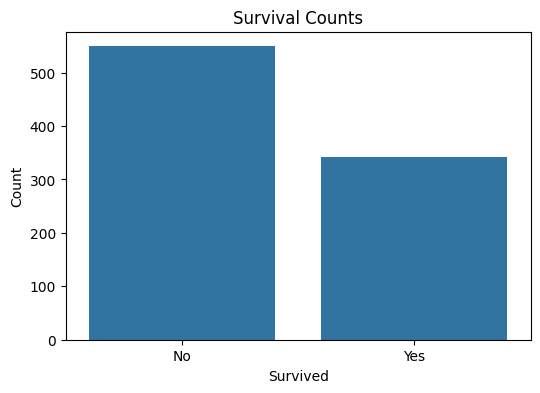

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### 3. Pclass
#### Analyze the distribution of passengers across different classes

In [ ]:
class_counts = df['Pclass'].value_counts()
print("Passenger class counts:")
print(class_counts)

Passenger class counts:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


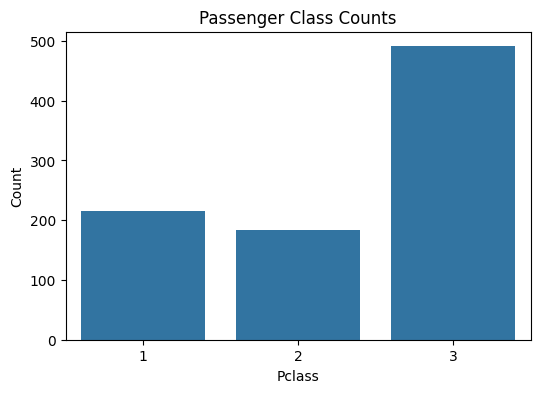

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Counts')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

### 4. Name
#### Extract titles from names and analyze if they correlate with survival

In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_counts = df['Title'].value_counts()
print("Title counts:")
print(title_counts)

Title counts:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


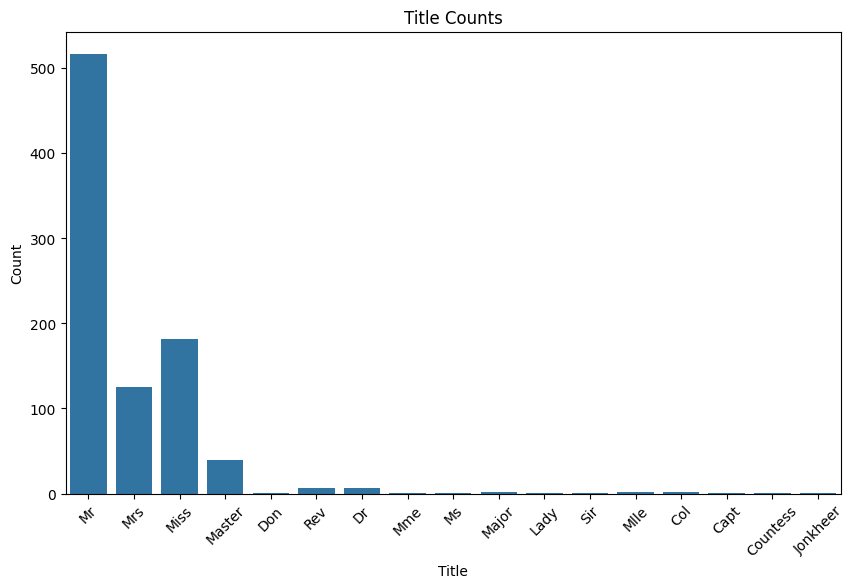

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=df)
plt.title('Title Counts')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 5. Sex
#### Analyze the survival rate based on gender

In [ ]:
sex_survival = df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:")
print(sex_survival)

Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


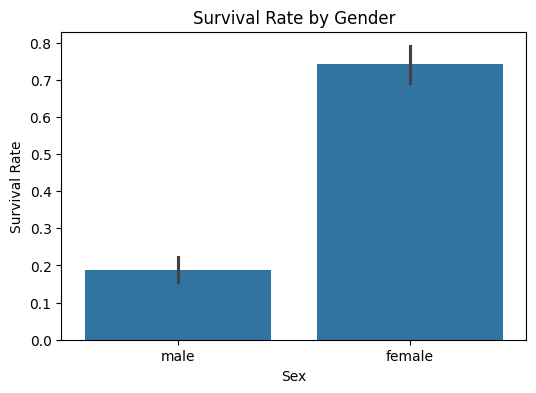

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

#### 6. Age
#### Handle missing values for Age

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

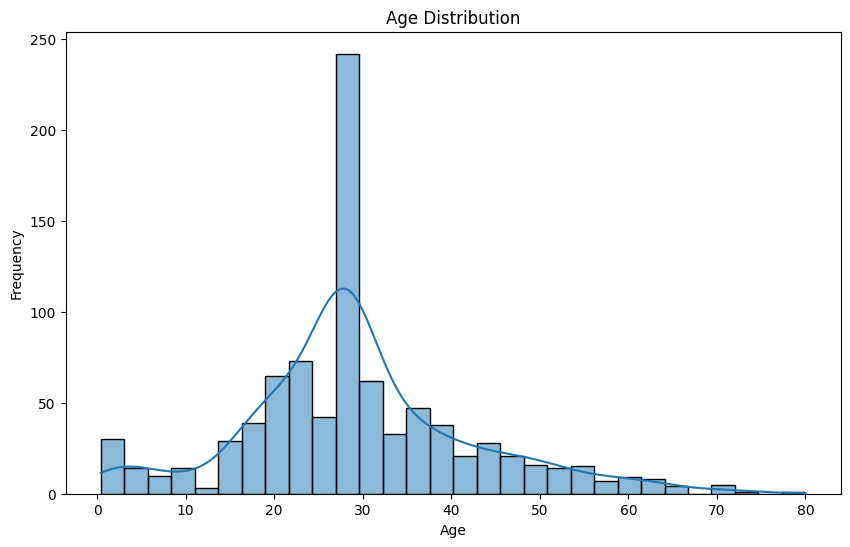

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

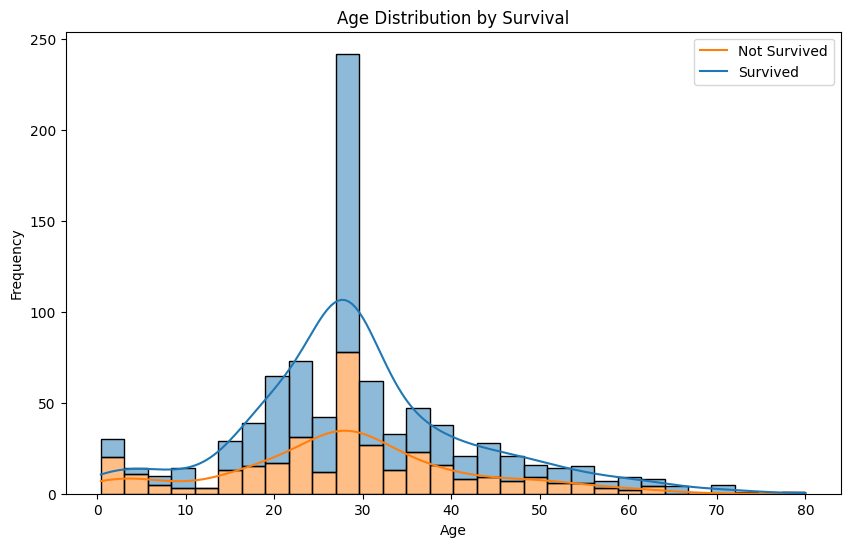

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Not Survived', 'Survived'])
plt.show()

#### 7. SibSp
#### Analyze if having siblings or spouses aboard affected survival

In [ ]:
sibsp_survival = df.groupby('SibSp')['Survived'].mean()
print("Survival rate by SibSp:")
print(sibsp_survival)

Survival rate by SibSp:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


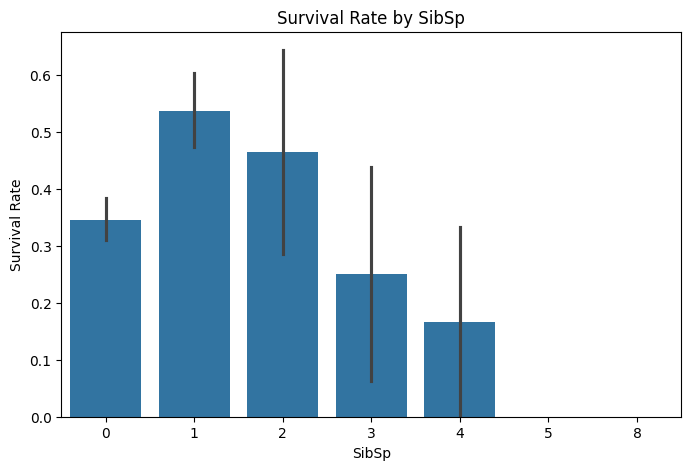

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()

#### 8. Parch
#### Analyze if having parents or children aboard affected survival

In [ ]:
parch_survival = df.groupby('Parch')['Survived'].mean()
print("Survival rate by Parch:")
print(parch_survival)

Survival rate by Parch:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


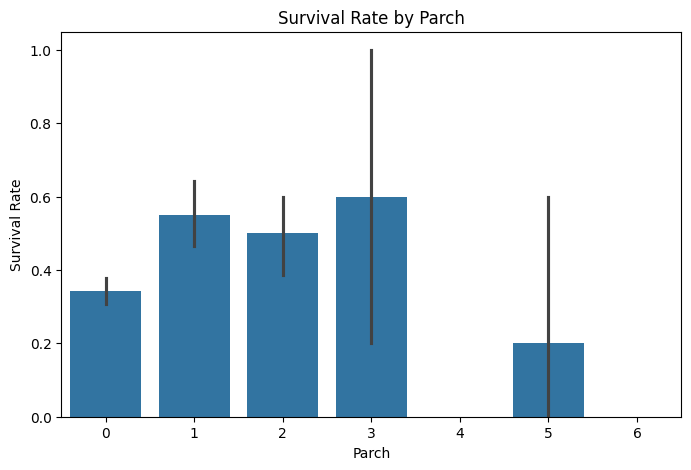

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.show()

#### 9. Fare
#### Analyze the distribution of fare and its relationship with survival

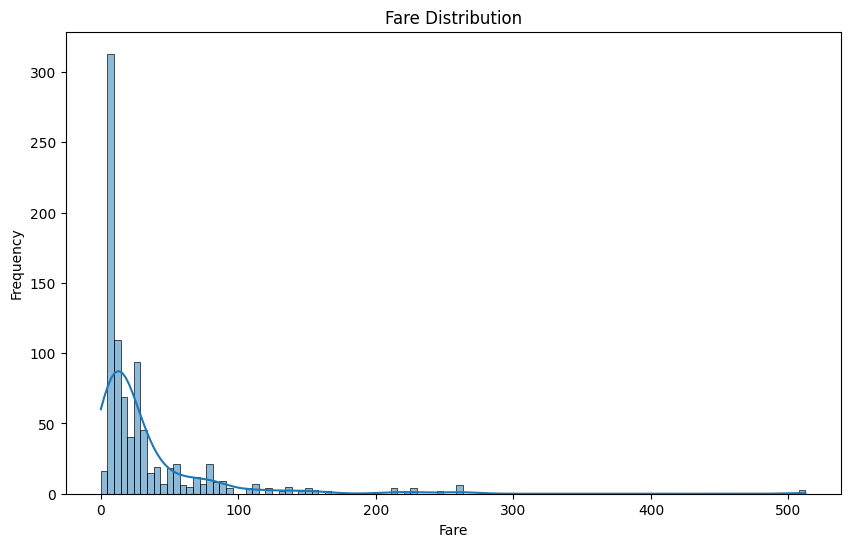

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', data=df, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

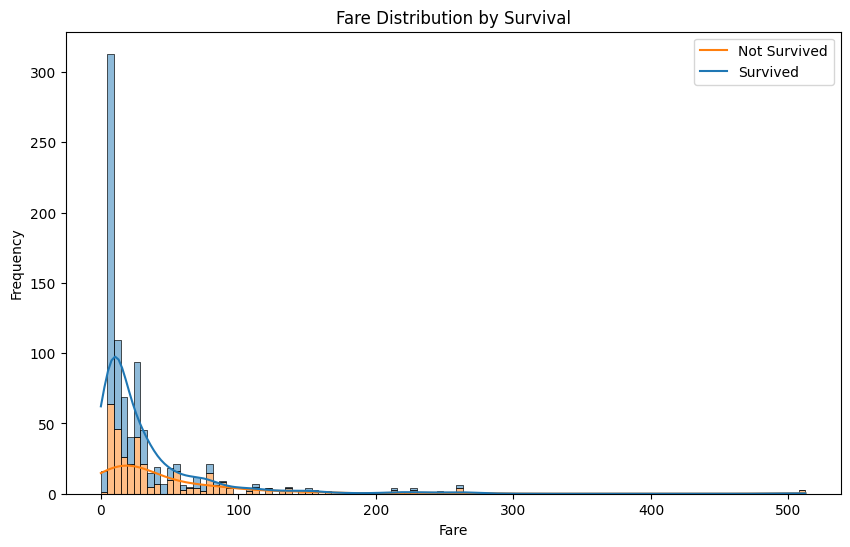

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', hue='Survived', data=df, kde=True, multiple='stack')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend(['Not Survived', 'Survived'])
plt.show()

#### 10. Cabin
#### Analyze if having a cabin recorded correlates with survival

In [ ]:
df['Cabin_Recorded'] = df['Cabin'].notna()
cabin_survival = df.groupby('Cabin_Recorded')['Survived'].mean()
print("Survival rate by Cabin_Recorded:")
print(cabin_survival)

Survival rate by Cabin_Recorded:
Cabin_Recorded
False    0.299854
True     0.666667
Name: Survived, dtype: float64


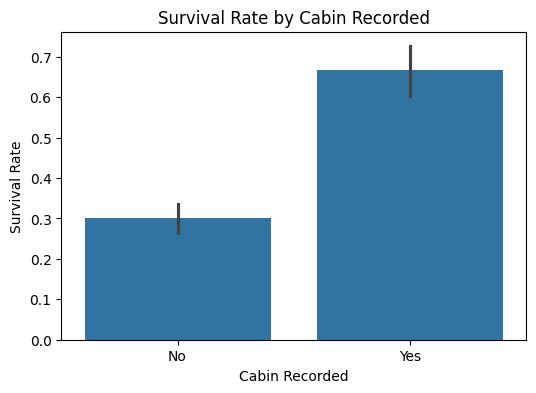

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Cabin_Recorded', y='Survived', data=df)
plt.title('Survival Rate by Cabin Recorded')
plt.xlabel('Cabin Recorded')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### 12. Embarked
#### Analyze the distribution of passengers and survival rates based on the port of embarkation

In [ ]:
embarked_counts = df['Embarked'].value_counts()
print("Passengers embarked counts:")
print(embarked_counts)

Passengers embarked counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


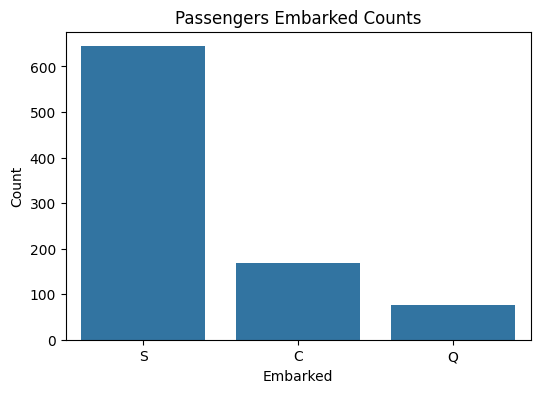

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title('Passengers Embarked Counts')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [ ]:
embarked_survival = df.groupby('Embarked')['Survived'].mean()
print("Survival rate by Embarked:")
print(embarked_survival)

Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


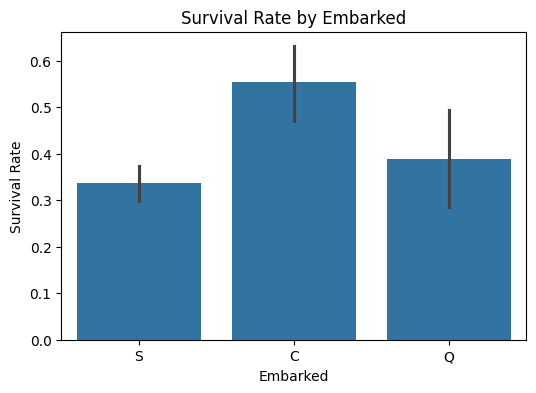

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Recorded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [ ]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Title               0
Cabin_Recorded      0
dtype: int64

In [ ]:
# Define a regular expression pattern to extract alphanumeric characters

pattern = re.compile(r'[A-Za-z0-9]+')

# Extract ticket information
for ticket in df['Ticket']:
    ticket_info = pattern.findall(ticket)
    print("Ticket:", ticket)
    print("Extracted Info:", ticket_info)
    print()

Ticket: A/5 21171
Extracted Info: ['A', '5', '21171']

Ticket: PC 17599
Extracted Info: ['PC', '17599']

Ticket: STON/O2. 3101282
Extracted Info: ['STON', 'O2', '3101282']

Ticket: 113803
Extracted Info: ['113803']

Ticket: 373450
Extracted Info: ['373450']

Ticket: 330877
Extracted Info: ['330877']

Ticket: 17463
Extracted Info: ['17463']

Ticket: 349909
Extracted Info: ['349909']

Ticket: 347742
Extracted Info: ['347742']

Ticket: 237736
Extracted Info: ['237736']

Ticket: PP 9549
Extracted Info: ['PP', '9549']

Ticket: 113783
Extracted Info: ['113783']

Ticket: A/5. 2151
Extracted Info: ['A', '5', '2151']

Ticket: 347082
Extracted Info: ['347082']

Ticket: 350406
Extracted Info: ['350406']

Ticket: 248706
Extracted Info: ['248706']

Ticket: 382652
Extracted Info: ['382652']

Ticket: 244373
Extracted Info: ['244373']

Ticket: 345763
Extracted Info: ['345763']

Ticket: 2649
Extracted Info: ['2649']

Ticket: 239865
Extracted Info: ['239865']

Ticket: 248698
Extracted Info: ['248698']



In [ ]:
def extract_ticket_prefix(ticket):
    if ' ' in ticket:
        return ticket.split(' ')[0]
    else:
        return 'None'

df['Ticket_Prefix'] = df['Ticket'].apply(extract_ticket_prefix)


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Recorded,Ticket_Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,None


In [ ]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Title               0
Cabin_Recorded      0
Ticket_Prefix       0
dtype: int64

In [ ]:
df.drop(columns=['Cabin','Name','Ticket','PassengerId'],inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Recorded,Ticket_Prefix
0,0,3,male,22.0,1,0,7.2500,S,Mr,False,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss,False,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True,None
4,0,3,male,35.0,0,0,8.0500,S,Mr,False,None


In [ ]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [ ]:
df['Cabin_Recorded'].value_counts()

Cabin_Recorded
False    687
True     204
Name: count, dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Recorded,Ticket_Prefix
0,0,3,1,22.0,1,0,7.2500,S,Mr,False,A/5
1,1,1,0,38.0,1,0,71.2833,C,Mrs,True,PC
2,1,3,0,26.0,0,0,7.9250,S,Miss,False,STON/O2.
3,1,1,0,35.0,1,0,53.1000,S,Mrs,True,None
4,0,3,1,35.0,0,0,8.0500,S,Mr,False,None


In [ ]:
categorical_features = ['Embarked', 'Title','Ticket_Prefix']
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Recorded,Embarked_C,Embarked_Q,...,Ticket_Prefix_SOTON/O.Q.,Ticket_Prefix_SOTON/O2,Ticket_Prefix_SOTON/OQ,Ticket_Prefix_STON/O,Ticket_Prefix_STON/O2.,Ticket_Prefix_SW/PP,Ticket_Prefix_W./C.,Ticket_Prefix_W.E.P.,Ticket_Prefix_W/C,Ticket_Prefix_WE/P
0,0,3,1,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,0,38.0,1,0,71.2833,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1,1,0,35.0,1,0,53.1000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,3,1,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
X = df_encoded.drop(['Survived'], axis=1)
y = df_encoded['Survived']
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
sfm = SelectFromModel(clf, threshold=0.05)  # Adjust threshold as needed
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Pclass', 'Sex', 'Age', 'Fare', 'Title_Mr'], dtype='object')


### Modeling 

In [ ]:
X = df_encoded[['Pclass', 'Sex', 'Age', 'Fare', 'Title_Mr']]
y = df_encoded['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': xgb.XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize variables to store best model information
best_model_name = None
best_model = None
best_model_score = 0

# Perform randomized search and cross-validation
for name, model in models.items():
    print(f"Training {name}...")
    if name == 'XGBoost':
        params = {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [50, 100, 200],
            'min_child_weight': [1, 3, 5],
            'gamma': [0.0, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }
        random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    else:
        params = {}
        random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    test_score = random_search.best_estimator_.score(X_test, y_test)
    if test_score > best_model_score:
        best_model_name = name
        best_model = random_search.best_estimator_
        best_model_score = test_score

# Save the best model as a pickle file
pickle.dump(best_model, open(f'{best_model_name}_model.pkl', 'wb'))
print(f"Best model ({best_model_name}) saved as {best_model_name}_model.pkl")

Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training Naive Bayes...
Training Logistic Regression...
Training XGBoost...
Training K-Nearest Neighbors...
Best model (XGBoost) saved as XGBoost_model.pkl


## ==================================================================

### Titanic Dataset Explanation

| Field       | Description                                                  | Missing Data |
|-------------|--------------------------------------------------------------|--------------|
| PassengerId | A unique identifier for each passenger.                      | 0            |
| Survived    | Indicates whether the passenger survived (1) or not (0).     | 0            |
| Pclass      | Ticket class, with three possible values (1 = 1st, 2 = 2nd, 3 = 3rd). | 0            |
| Name        | Name of the passenger.                                       | 0            |
| Sex         | Gender of the passenger.                                     | 0            |
| Age         | Age of the passenger. (Missing data for 177 passengers)      | 177          |
| SibSp       | Number of siblings/spouses aboard the Titanic.               | 0            |
| Parch       | Number of parents/children aboard the Titanic.               | 0            |
| Ticket      | Ticket number.                                               | 0            |
| Fare        | Passenger fare.                                              | 0            |
| Cabin       | Cabin number. (Missing data for 687 passengers)              | 687          |
| Embarked    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). | 2            |

- The missing data in the "Age" column for 177 passengers means that the age information for those individuals is not available in the dataset.
- Similarly, the missing data in the "Cabin" column for 687 passengers indicates that cabin information for those individuals is not provided.
- Lastly, there are two missing values in the "Embarked" column, indicating that the port of embarkation information is missing for two passengers.
